In [ ]:
#ui+rubrick ok
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import tkinter as tk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib import colors
import random
from copy import deepcopy
import json
import time

plt.style.use('ggplot')

def clockwise(x,n):
    def clockwise1(x): 
        y = np.zeros(9).reshape(3,3)
        y[:,0] = x[2]
        y[:,1] = x[1]
        y[:,2] = x[0]
        return y
        
    for i in range(n):
        x = clockwise1(x)
    
    return x

def counter_clockwise(x,n):
    def counter_clockwise1(x): 
        y = np.zeros(9).reshape(3,3)
        y[:,0] = np.flip(x[0])
        y[:,1] = np.flip(x[1])
        y[:,2] = np.flip(x[2])
        return y
        
    for i in range(n):
        x = counter_clockwise1(x)
    
    return x

def slide_right4ele(a,b,c,d,n):
    
    x = np.append([np.append(a,b)],[np.append(c,d)])
    x = np.append(x[-n:],x[:-n])
    return x[0:3],x[3:6],x[6:9],x[9:12]
    
def rotate(surface,axis):
    surface = deepcopy(surface)
    if axis == 'x0':
        a,b,c,d = slide_right4ele(surface['1'][0],surface['2'][0],surface['3'][0],surface['4'][0],3)
        surface['1'][0] = a
        surface['2'][0] = b
        surface['3'][0] = c
        surface['4'][0] = d

        surface['5'] = clockwise(surface['5'],3)

    elif axis == 'x1':
        a,b,c,d = slide_right4ele(surface['1'][1],surface['2'][1],surface['3'][1],surface['4'][1],3)
        surface['1'][1] = a
        surface['2'][1] = b
        surface['3'][1] = c
        surface['4'][1] = d
   
    elif axis == 'x2':
        a,b,c,d = slide_right4ele(surface['1'][2],surface['2'][2],surface['3'][2],surface['4'][2],3)
        surface['1'][2] = a
        surface['2'][2] = b
        surface['3'][2] = c
        surface['4'][2] = d
        
        surface['6'] = counter_clockwise(surface['6'],3)
   
    elif axis == 'y0':
        a,b,c,d = slide_right4ele(np.flip(surface['3'][:,-1]),surface['5'][:,0],surface['1'][:,0],surface['6'][:,0],3)
        surface['3'][:,-1] = np.flip(a)
        surface['5'][:,0] = b
        surface['1'][:,0] = c
        surface['6'][:,0] = d
        
        surface['4'] = counter_clockwise(surface['4'],3)
              
    
    elif axis == 'y1':
        a,b,c,d = slide_right4ele(np.flip(surface['3'][:,1]),surface['5'][:,1],surface['1'][:,1],surface['6'][:,1],3)
        surface['3'][:,1] = np.flip(a)
        surface['5'][:,1] = b
        surface['1'][:,1] = c
        surface['6'][:,1] = d
    
    elif axis == 'y2':
        a,b,c,d = slide_right4ele(np.flip(surface['3'][:,0]),surface['5'][:,2],surface['1'][:,2],surface['6'][:,2],3)
        surface['3'][:,0] = np.flip(a)
        surface['5'][:,2] = b
        surface['1'][:,2] = c
        surface['6'][:,2] = d
        
        surface['2'] = clockwise(surface['2'],3)
                      

    elif axis == 'z0':
        a,b,c,d = slide_right4ele(np.flip(surface['5'][2]),surface['2'][:,0],np.flip(surface['6'][0]),np.flip(surface['4'][:,2]),3)
        surface['5'][2] = a
        surface['2'][:,0] = np.flip(b)
        surface['6'][0] = np.flip(c)
        surface['4'][:,2] = np.flip(d)
        
        surface['1'] = counter_clockwise(surface['1'],3)
  
    elif axis == 'z1':
        a,b,c,d = slide_right4ele(np.flip(surface['5'][1]),surface['2'][:,1],np.flip(surface['6'][1]),np.flip(surface['4'][:,1]),3)
        surface['5'][1] = a
        surface['2'][:,1] = np.flip(b)
        surface['6'][1] = np.flip(c)
        surface['4'][:,1] = np.flip(d)
    
    elif axis == 'z2':
        a,b,c,d = slide_right4ele(np.flip(surface['5'][0]),surface['2'][:,2],np.flip(surface['6'][2]),np.flip(surface['4'][:,0]),3)
        surface['5'][0] = a
        surface['2'][:,2] = np.flip(b)
        surface['6'][2] = np.flip(c)
        surface['4'][:,0] = np.flip(d)
        
        surface['3'] = clockwise(surface['3'],3)
        
    return surface

def updateUi_surface(data):
       
    cmap = colors.ListedColormap(['blue','gray','green','yellow','red','orange'])
    bounds = [0,1,2,3,4,5,6]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    
    ax[0].imshow(data['1'], cmap=cmap, norm=norm)
    ax[0].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[0].set_xticks(np.arange(-.5, 2.5, 1));
    ax[0].set_yticks(np.arange(-.5, 2.5, 1));
    ax[0].axes.xaxis.set_ticklabels([])
    ax[0].axes.yaxis.set_ticklabels([])
    ax[0].set_title('surface 1')

    ax[1].imshow(data['2'], cmap=cmap, norm=norm)
    ax[1].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[1].set_xticks(np.arange(-.5, 2.5, 1));
    ax[1].set_yticks(np.arange(-.5, 2.5, 1));
    ax[1].axes.xaxis.set_ticklabels([])
    ax[1].axes.yaxis.set_ticklabels([])
    ax[1].set_title('surface 2')

    ax[2].imshow(data['3'], cmap=cmap, norm=norm)
    ax[2].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[2].set_xticks(np.arange(-.5, 2.5, 1));
    ax[2].set_yticks(np.arange(-.5, 2.5, 1));
    ax[2].axes.xaxis.set_ticklabels([])
    ax[2].axes.yaxis.set_ticklabels([])
    ax[2].set_title('surface 3')

    ax[3].imshow(data['4'], cmap=cmap, norm=norm)
    ax[3].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[3].set_xticks(np.arange(-.5, 2.5, 1));
    ax[3].set_yticks(np.arange(-.5, 2.5, 1));
    ax[3].axes.xaxis.set_ticklabels([])
    ax[3].axes.yaxis.set_ticklabels([])
    ax[3].set_title('surface 4')

    ax[4].imshow(data['5'], cmap=cmap, norm=norm)
    ax[4].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[4].set_xticks(np.arange(-.5, 2.5, 1));
    ax[4].set_yticks(np.arange(-.5, 2.5, 1));
    ax[4].axes.xaxis.set_ticklabels([])
    ax[4].axes.yaxis.set_ticklabels([])
    ax[4].set_title('surface 5')

    ax[5].imshow(data['6'], cmap=cmap, norm=norm)
    ax[5].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[5].set_xticks(np.arange(-.5, 2.5, 1));
    ax[5].set_yticks(np.arange(-.5, 2.5, 1));
    ax[5].axes.xaxis.set_ticklabels([])
    ax[5].axes.yaxis.set_ticklabels([])
    ax[5].set_title('surface 6')
        
    line.draw()
    
def BX0():
    print('rotate X0.. ')
    current_surface['surface'] = rotate(current_surface['surface'],'x0')
    
    l['text'] = 'vvvv'

    updateUi_surface(current_surface['surface'])

def BX1():
    print('rotate X1..')
    current_surface['surface'] = rotate(current_surface['surface'],'x1')
    updateUi_surface(current_surface['surface'])
       
def BX2():
    print('rotate X2..')
    current_surface['surface'] = rotate(current_surface['surface'],'x2')
    updateUi_surface(current_surface['surface'])
     
def BY0():
    print('rotate Y0..')
    current_surface['surface'] = rotate(current_surface['surface'],'y0')
    updateUi_surface(current_surface['surface'])
     
def BY1():
    print('rotate Y1..')
    current_surface['surface'] = rotate(current_surface['surface'],'y1')
    updateUi_surface(current_surface['surface'])
    
def BY2():
    print('rotate Y2..')
    current_surface['surface'] = rotate(current_surface['surface'],'y2')
    updateUi_surface(current_surface['surface'])
    
def BZ0():
    print('rotate Z0..')
    current_surface['surface'] = rotate(current_surface['surface'],'z0')
    updateUi_surface(current_surface['surface'])
    
def BZ1():
    print('rotate Z1..')
    current_surface['surface'] = rotate(current_surface['surface'],'z1')
    updateUi_surface(current_surface['surface'])
    
def BZ2():
    print('rotate Z2..')
    current_surface['surface'] = rotate(current_surface['surface'],'z2')
    updateUi_surface(current_surface['surface'])
    
# gggggggggggggggggggggggg
def GO():
    global nodes_expand,m,mv,v,lenge,kk,xm,x
    print('start..')

    if m == '':
        sta = 'up'
        print('up...',xm*kk)
        print(xm)
        print(xm[:-2*kk])
        nodes_expand = unit_expand(xm[:-2*kk])
        print(nodes_expand)
        if -2*kk+2 != 0:
            m,mv,v,lenge = find_min_that_more_threshold(nodes_expand,threshold,xm[:-2*kk+2])
        else:
            m,mv,v,lenge = find_min_that_more_threshold(nodes_expand,threshold,xm)
        if m == '':
            kk += 1
        else:
            kk = 1
        updateCurrenrSurface(xm[:-2*kk])
        
    else:
        xm = m
        x = xm + '\t value : ' + str(mv) + '\tg:'+str(v) + '\th:'+str(lenge)
    
        m,mv,v,lenge = find_min_that_more_threshold(nodes_expand,threshold,'')
    
        updateCurrenrSurface(m)
        sta = 'down'
        


    nodes_expand_msg = ''
    for i in nodes_expand.keys():
        nodes_expand_msg += i+':'+str(nodes_expand[i]['cost']) + '\n'

    print(nodes_expand_msg)
    
    
    updateUi_surface(current_surface['surface'])

    msg = x
    msg += '\n-------------------'+sta+str(kk)+'----------------------'
    msg += '\n'+nodes_expand_msg
    msg += '\nmin&<threshold : ' + m + '\t value : ' + str(mv) + '\tg:'+str(v) + '\th:'+str(lenge)
    msg += '\nthreshold : ' + str(threshold)
    msg += '\nnext path : ' + current_surface['path']

    print(msg)
    
    

    l['text'] = msg
    nodes_expand = unit_expand(m)

    
def RANDOM():
    print('Start surface..')
    print(start_surface)
    updateUi_surface(start_surface)

#-- UI setup -------------------------------------------------------------------------------
root = tk.Tk()
root.geometry('1200x450')
root.title("AI + Rubrick")

left_frame = tk.Frame(root)
left_frame.place(relx=0.03, rely=0.05, relwidth=0.25, relheight=0.9)

right_frame = tk.Frame(root, bg='#C0C0C0', bd=1.5)
right_frame.place(relx=0.3, rely=0.05, relwidth=0.65, relheight=0.5)

right_frame2 = tk.Frame(root, bg='#C0C0C0', bd=1.5)
right_frame2.place(relx=0.3, rely=0.5, relwidth=0.65, relheight=0.5)


#text
l = tk.Label(right_frame2, text = "Fact of the Day\nreusfdhgidf",justify=tk.LEFT)
# l.config(font =("Courier", 14))
l.place(rely=(0.1 + 0.1*0.01) ,relheight=1, relwidth=1)
l.pack(side=tk.LEFT, fill=tk.BOTH,expand=1)     
        
#initial graph
figure, ax = plt.subplots(1, 6,figsize=(20,20))
line = FigureCanvasTkAgg(figure, right_frame)
line.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH,expand=1)
x = np.linspace(0, 8, 1000)

#Button
RH = 0.10
BX0 = tk.Button(left_frame,text="X0",command = BX0)
BX0.place(relheight=RH, relwidth=1)
BX1 = tk.Button(left_frame,text="X1",command = BX1)
BX1.place(rely=(0.1 + RH*0.01) ,relheight=RH, relwidth=1)
BX2 = tk.Button(left_frame,text="X2",command = BX2)
BX2.place(rely= 2*(0.1 + RH*0.01) ,relheight=RH, relwidth=1)
BY0 = tk.Button(left_frame,text="Y0",command = BY0)
BY0.place(rely= 3*(0.1 + RH*0.01) ,relheight=RH, relwidth=1)
BY1 = tk.Button(left_frame,text="Y1",command = BY1)
BY1.place(rely= 4*(0.1 + RH*0.01) ,relheight=RH, relwidth=1)
BY2 = tk.Button(left_frame,text="Y2",command = BY2)
BY2.place(rely= 5*(0.1 + RH*0.01) ,relheight=RH, relwidth=1)
BZ0 = tk.Button(left_frame,text="Z0",command = BZ0)
BZ0.place(rely= 6*(0.1 + RH*0.01) ,relheight=RH, relwidth=1)
BZ1 = tk.Button(left_frame,text="Z1",command = BZ1)
BZ1.place(rely= 7*(0.1 + RH*0.01) ,relheight=RH, relwidth=1)
BZ2 = tk.Button(left_frame,text="Z2",command = BZ2)
BZ2.place(rely= 8*(0.1 + RH*0.01) ,relheight=RH, relwidth=1)
GO = tk.Button(left_frame,text="Go",command = GO)
GO.place(rely= 9*(0.1 + RH*0.01) ,relheight=RH, relwidth=0.5)
RANDOM = tk.Button(left_frame,text="Random",command = RANDOM)
RANDOM.place(rely= 9*(0.1 + RH*0.01), relx=0.5,relheight=RH, relwidth=0.5)

s = {
    '1' : np.array([0,0,0,0,0,0,0,0,0]).reshape(3,3),
    '2' : np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3),
    '3' : np.array([2,2,2,2,2,2,2,2,2]).reshape(3,3),
    '4' : np.array([3,3,3,3,3,3,3,3,3]).reshape(3,3),
    '5' : np.array([4,4,4,4,4,4,4,4,4]).reshape(3,3),
    '6' : np.array([5,5,5,5,5,5,5,5,5]).reshape(3,3),
    
}

updateUi_surface(s)
# root.mainloop()
#----------------------------------------------------------------------------------------------------
#start
    
goal_surface = {
    '1' : np.array([0,0,0,0,0,0,0,0,0]).reshape(3,3),
    '2' : np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3),
    '3' : np.array([2,2,2,2,2,2,2,2,2]).reshape(3,3),
    '4' : np.array([3,3,3,3,3,3,3,3,3]).reshape(3,3),
    '5' : np.array([4,4,4,4,4,4,4,4,4]).reshape(3,3),
    '6' : np.array([5,5,5,5,5,5,5,5,5]).reshape(3,3),
    
}

start_surface = {
    '1' : np.array([0,0,0,0,0,0,0,0,0]).reshape(3,3),
    '2' : np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3),
    '3' : np.array([2,2,2,2,2,2,2,2,2]).reshape(3,3),
    '4' : np.array([3,3,3,3,3,3,3,3,3]).reshape(3,3),
    '5' : np.array([4,4,4,4,4,4,4,4,4]).reshape(3,3),
    '6' : np.array([5,5,5,5,5,5,5,5,5]).reshape(3,3),
    
}

start_surface = rotate(start_surface,'x0')
start_surface = rotate(start_surface,'x0')
start_surface = rotate(start_surface,'x0')
start_surface = rotate(start_surface,'y1')
start_surface = rotate(start_surface,'y1')
start_surface = rotate(start_surface,'y1')
start_surface = rotate(start_surface,'z2')
start_surface = rotate(start_surface,'z2')
start_surface = rotate(start_surface,'z2')
start_surface = rotate(start_surface,'x1')
start_surface = rotate(start_surface,'x1')
start_surface = rotate(start_surface,'x1')

#------------------------------------------------------------------------------------

def find_cost(goal_surface,surface):
    surface = deepcopy(surface)
    def surfaceToOneArray(surface):
        x = np.array([])
        for i in range(1,7):
            x = np.append(x,surface[str(i)])
        return x
    def count_zeros(x):
        count = 0
        for i in x:
            if i == 0:
                count += 1
        return count

    goal_array = surfaceToOneArray(goal_surface)
    start_array = surfaceToOneArray(surface)
        
    x = np.subtract(goal_array, start_array) 

    return 54-count_zeros(x)


# def updateCurrenrSurface(path):
# #     print('path find',path)
#     print('current_surface',current_surface['path'])
#     surface = current_surface['surface']
#     if len(current_surface['path']) < len(path):
# #         print('aaa')
#         a = path.replace(current_surface['path'],'')
#         print('+',a)
#         surface = rotate(current_surface['surface'],a)
    
#     elif len(current_surface['path']) > len(path):
#         a = current_surface['path'].replace(path,'')
#         print('-',a)
#         surface = rotate(current_surface['surface'],a)
#         surface = rotate(current_surface['surface'],a)
#         surface = rotate(current_surface['surface'],a)
        
#     current_surface.update({'path':path,'surface':surface})

def update_current_surface(path):
    p = [path[i:i+2] for i in range(0, len(path), 2)]
    print(p)
    sf = start_surface
    for  i in p:
        sf = rotate(sf,i)
        
    s = { 'path':path, 'surface':sf}
    return s
    
def unit_expand(node):
#     global start_surface,goal_surface
    n = [node[i:i+2] for i in range(0, len(node), 2)]
    e = {}
    surface = deepcopy(start_surface)
#     surface = start_surface
#     print(n)
    for i in ['x0','x1','x2','y0','y1','y2','z0','z1','z2']:
        #find current serface
        for ii in n:
            if ii == 'st':
                surface = deepcopy(start_surface)
            else:
                surface = rotate(surface,ii)
        lenge = int(len(node)/2)
        cost = find_cost(goal_surface,rotate(surface,i))
        print('cost=',cost + lenge,'lenge',lenge,'value',cost)
        e.update({node+i:{'cost':cost + lenge,'lenge':lenge,'value':cost}})
        
    return e

def find_min_that_more_threshold(node,threshold,everexplane,next_threshold):
#     find min alter
    nod = deepcopy(node)
    m = ''
    mv = 99999
    v = ''
    l = ''
    print(nod)

    Z = nod.keys()
    if everexplane != '':
#         everexplane = 'stxox1y1z0x2'
        u = unit_expand(everexplane[:-2])
        Z = []
        for i in u.keys():
            if i != everexplane and u[i]['cost'] > u[everexplane]['cost']:
                Z.append(i)
        
# #         everexplane = 'stxox1y1z0y2'
# #         everexplane[-2:]
#         z = 'x0x1x2y0y1y2z0z1z2'
#         z = z.split(everexplane[-2:])
#         z = z[-1]
#         z = [z[i:i+2] for i in range(0, len(z), 2)]
#         z
#         Z = []
#         for i in z:
#             Z.append(everexplane[:-2]+i)
            
    for i in Z:
        print(i,nod[i]['cost'])
        if nod[i]['cost'] < threshold and nod[i]['cost'] < mv :
            m = i
            mv = nod[i]['cost']
            v = nod[i]['value']
            l = nod[i]['lenge']
        if m == '':
            for i in nod.keys():
                if nod[i]['cost'] >= threshold:
                    if next_threshold == threshold:
                        next_threshold = nod[i]['cost']
                    if nod[i]['cost'] < next_threshold and nod[i]['cost'] > threshold:
                        next_threshold = nod[i]['cost']

            
        
    return m,mv,v,l,next_threshold

# def find_min_that_more_threshold(node,threshold,everexplane):
# #     find min alter
#     nod = deepcopy(node)
#     m = ''
#     mv = 99999
#     v = ''
#     l = ''
#     print(nod)
#     for i in nod.keys():
#         print(i,nod[i]['cost'])
#         if nod[i]['cost'] < threshold and nod[i]['cost'] < mv and i != everexplane:
#             m = i
#             mv = nod[i]['cost']
#             v = nod[i]['value']
#             l = nod[i]['lenge']
        
#     return m,mv,v,l

val_start = find_cost(goal_surface,start_surface)
current_surface = {'path': 'st','surface':start_surface}
nodes_expand = unit_expand('st')
m = 'st'
mv = find_cost(goal_surface,start_surface)
v = mv
lenge = 0
kk = 1
xm = ''
x = ''
threshold = 1
updateUi_surface(current_surface['surface'])
next_threshold = 1
found = False

for i in range(100000):
    if found == True:        
        break
    if v == 0:
        found = True
        print('xmmmmm111111111111',xm)
        
    
#     if xm == 'st':
    if len(xm) == 2:
        threshold = next_threshold
        xm = ''
#     if len(list(nodes_expand.keys())[0]) == 2:
#         print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
#         break
#         val_start = find_cost(goal_surface,start_surface)
#         current_surface = {'path': 'st','surface':start_surface}
#         nodes_expand = unit_expand('st')
#         m = 'st'
#         mv = find_cost(goal_surface,start_surface)
#         v = mv
#         lenge = 0
#         kk = 1
#         xm = ''
#         x = ''
#         threshold = next_threshold
#         m,mv,v,lenge,next_threshold = find_min_that_more_threshold(nodes_expand,threshold,xm,next_threshold)
        
#         updateUi_surface(current_surface['surface'])
#         next_threshold = threshold
#         threshold = next_threshold
#         next_threshold = 999
#         xm = ''
#         m,mv,v,lenge,next_threshold = find_min_that_more_threshold(nodes_expand,threshold,xm,next_threshold)
        
    if m == '' and current_surface['path'] != 'st':
        sta = 'up'
        print('up...',xm*kk)
        print(xm)
        print(xm[:-2*kk])
        nodes_expand = unit_expand(xm[:-2*kk])
        print(nodes_expand)
        if -2*kk+2 != 0:
            m,mv,v,lenge,next_threshold = find_min_that_more_threshold(nodes_expand,threshold,xm[:-2*kk+2],next_threshold)
        else:
            m,mv,v,lenge,next_threshold = find_min_that_more_threshold(nodes_expand,threshold,xm,next_threshold)
        if m == '':
            kk += 1
        else:
            kk = 1
#         updateCurrenrSurface('st'+xm[:-2*kk])
        
    else:
        print('down...')
        xm = m
        x = xm + '\t value : ' + str(mv) + '\tg:'+str(v) + '\th:'+str(lenge) + '\tnext_threshold: '+str(next_threshold)
    
        m,mv,v,lenge,next_threshold = find_min_that_more_threshold(nodes_expand,threshold,'',next_threshold)
    
#         updateCurrenrSurface('st'+m)
        sta = 'down'
        


    nodes_expand_msg = ''
    for i in nodes_expand.keys():
        nodes_expand_msg += i+':'+str(nodes_expand[i]['cost']) + '\n'

    print(nodes_expand_msg)
    
#     updateCurrenrSurface('st'+xm)
    current_surface = update_current_surface(xm)

    print('\n==========================\n',current_surface)
    
#     updateUi_surface(current_surface['surface'])
    line.draw()

    msg = x
    msg += '\n-------------------'+sta+str(kk)+'----------------------'
    msg += '\n'+nodes_expand_msg
    msg += '\nmin&<threshold : ' + m + '\t value : ' + str(mv) + '\tg:'+str(v) + '\th:'+str(lenge)
    msg += '\nthreshold : ' + str(threshold)
    msg += '\nnext path : ' + current_surface['path']

    print(msg)
    
    
    
    

    l['text'] = msg
#     nodes_expand = unit_expand(m)
#     if current_surface['path'] == '':
#         current_surface = update_current_surface('st')
    
    nodes_expand = unit_expand(current_surface['path'])
    
#     time.sleep(1)


root.mainloop()

In [14]:
everexplane = 'stxox1y1z0x2'
u = unit_expand(everexplane[:-2])
Z = []
for i in u.keys():
    if i != everexplane and u[i]['cost'] > u[everexplane]['cost']:
        Z.append(i)

print(Z)
u
#         everexplane = 'stxox1y1z0y2'
# #         everexplane[-2:]
# z = 'x0x1x2y0y1y2z0z1z2'
# z = z.split(everexplane[-2:])
# z = z[-1]
# z = [z[i:i+2] for i in range(0, len(z), 2)]
# z
# Z = []
# for i in z:
#     Z.append(everexplane[:-2]+i)
# Z

cost= 36 lenge 5 value 31
cost= 41 lenge 5 value 36
cost= 42 lenge 5 value 37
cost= 42 lenge 5 value 37
cost= 46 lenge 5 value 41
cost= 39 lenge 5 value 34
cost= 38 lenge 5 value 33
cost= 48 lenge 5 value 43
cost= 33 lenge 5 value 28
['stxox1y1z0y1', 'stxox1y1z0z1']


{'stxox1y1z0x0': {'cost': 36, 'lenge': 5, 'value': 31},
 'stxox1y1z0x1': {'cost': 41, 'lenge': 5, 'value': 36},
 'stxox1y1z0x2': {'cost': 42, 'lenge': 5, 'value': 37},
 'stxox1y1z0y0': {'cost': 42, 'lenge': 5, 'value': 37},
 'stxox1y1z0y1': {'cost': 46, 'lenge': 5, 'value': 41},
 'stxox1y1z0y2': {'cost': 39, 'lenge': 5, 'value': 34},
 'stxox1y1z0z0': {'cost': 38, 'lenge': 5, 'value': 33},
 'stxox1y1z0z1': {'cost': 48, 'lenge': 5, 'value': 43},
 'stxox1y1z0z2': {'cost': 33, 'lenge': 5, 'value': 28}}

In [9]:
everexplane = 'stxox1y1z0'
everexplane[-2:]
z = 'x0x1x2x3y0y1y2y3z0z1z2z3'
z = z.split(everexplane[-2:])
z[-1]

'z1z2z3'

cost= 32 lenge 1 value 31
cost= 31 lenge 1 value 30
cost= 44 lenge 1 value 43
cost= 42 lenge 1 value 41
cost= 33 lenge 1 value 32
cost= 44 lenge 1 value 43
cost= 43 lenge 1 value 42
cost= 43 lenge 1 value 42
cost= 29 lenge 1 value 28
down...
{'stx0': {'cost': 32, 'lenge': 1, 'value': 31}, 'stx1': {'cost': 31, 'lenge': 1, 'value': 30}, 'stx2': {'cost': 44, 'lenge': 1, 'value': 43}, 'sty0': {'cost': 42, 'lenge': 1, 'value': 41}, 'sty1': {'cost': 33, 'lenge': 1, 'value': 32}, 'sty2': {'cost': 44, 'lenge': 1, 'value': 43}, 'stz0': {'cost': 43, 'lenge': 1, 'value': 42}, 'stz1': {'cost': 43, 'lenge': 1, 'value': 42}, 'stz2': {'cost': 29, 'lenge': 1, 'value': 28}}
stx0 32
stx1 31
stx2 44
sty0 42
sty1 33
sty2 44
stz0 43
stz1 43
stz2 29
stx0:32
stx1:31
stx2:44
sty0:42
sty1:33
sty2:44
stz0:43
stz1:43
stz2:29

['st']

 {'path': 'st', 'surface': {'1': array([[1, 5, 1],
       [1, 1, 3],
       [0, 5, 0]]), '2': array([[2, 2, 5],
       [4, 4, 4],
       [1, 1, 5]]), '3': array([[2., 2., 3.],
     

z2x0	 value : 18	g:17	h:1	next_threshold: 30
-------------------up1----------------------
z2x0:18
z2x1:32
z2x2:39
z2y0:42
z2y1:22
z2y2:40
z2z0:42
z2z1:43
z2z2:37

min&<threshold : z2y1	 value : 22	g:21	h:1
threshold : 30
next path : z2x0
cost= 30 lenge 2 value 28
cost= 36 lenge 2 value 34
cost= 48 lenge 2 value 46
cost= 46 lenge 2 value 44
cost= 38 lenge 2 value 36
cost= 44 lenge 2 value 42
cost= 39 lenge 2 value 37
cost= 41 lenge 2 value 39
cost= 40 lenge 2 value 38
down...
{'z2x0x0': {'cost': 30, 'lenge': 2, 'value': 28}, 'z2x0x1': {'cost': 36, 'lenge': 2, 'value': 34}, 'z2x0x2': {'cost': 48, 'lenge': 2, 'value': 46}, 'z2x0y0': {'cost': 46, 'lenge': 2, 'value': 44}, 'z2x0y1': {'cost': 38, 'lenge': 2, 'value': 36}, 'z2x0y2': {'cost': 44, 'lenge': 2, 'value': 42}, 'z2x0z0': {'cost': 39, 'lenge': 2, 'value': 37}, 'z2x0z1': {'cost': 41, 'lenge': 2, 'value': 39}, 'z2x0z2': {'cost': 40, 'lenge': 2, 'value': 38}}
z2x0x0 30
z2x0x1 36
z2x0x2 48
z2x0y0 46
z2x0y1 38
z2x0y2 44
z2x0z0 39
z2x0z1 4

z2y1x0	 value : 14	g:12	h:2	next_threshold: 31
-------------------down1----------------------
z2x0:18
z2x1:32
z2x2:39
z2y0:42
z2y1:22
z2y2:40
z2z0:42
z2z1:43
z2z2:37

min&<threshold : z2x0	 value : 18	g:17	h:1
threshold : 31
next path : z2y1x0
cost= 25 lenge 3 value 22
cost= 41 lenge 3 value 38
cost= 51 lenge 3 value 48
cost= 46 lenge 3 value 43
cost= 44 lenge 3 value 41
cost= 45 lenge 3 value 42
cost= 43 lenge 3 value 40
cost= 49 lenge 3 value 46
cost= 35 lenge 3 value 32
down...
{'z2y1x0x0': {'cost': 25, 'lenge': 3, 'value': 22}, 'z2y1x0x1': {'cost': 41, 'lenge': 3, 'value': 38}, 'z2y1x0x2': {'cost': 51, 'lenge': 3, 'value': 48}, 'z2y1x0y0': {'cost': 46, 'lenge': 3, 'value': 43}, 'z2y1x0y1': {'cost': 44, 'lenge': 3, 'value': 41}, 'z2y1x0y2': {'cost': 45, 'lenge': 3, 'value': 42}, 'z2y1x0z0': {'cost': 43, 'lenge': 3, 'value': 40}, 'z2y1x0z1': {'cost': 49, 'lenge': 3, 'value': 46}, 'z2y1x0z2': {'cost': 35, 'lenge': 3, 'value': 32}}
z2y1x0x0 25
z2y1x0x1 41
z2y1x0x2 51
z2y1x0y0 46
z2y1x0

cost= 46 lenge 3 value 43
cost= 44 lenge 3 value 41
cost= 45 lenge 3 value 42
cost= 43 lenge 3 value 40
cost= 49 lenge 3 value 46
cost= 35 lenge 3 value 32
z2y1x0x1 41
z2y1x0x2 51
z2y1x0y0 46
z2y1x0y1 44
z2y1x0y2 45
z2y1x0z0 43
z2y1x0z1 49
z2y1x0z2 35
z2y1x0x0:25
z2y1x0x1:41
z2y1x0x2:51
z2y1x0y0:46
z2y1x0y1:44
z2y1x0y2:45
z2y1x0z0:43
z2y1x0z1:49
z2y1x0z2:35

['z2', 'y1', 'x0', 'x0', 'x0']

 {'path': 'z2y1x0x0x0', 'surface': {'1': array([[2, 2, 2],
       [1, 0, 3],
       [0, 0, 0]]), '2': array([[3, 4, 3],
       [4, 4, 1],
       [1, 1, 1]]), '3': array([[0., 0., 0.],
       [2., 2., 2.],
       [2., 2., 2.]]), '4': array([[1, 0, 1],
       [3, 5, 0],
       [3, 3, 3]]), '5': array([[4., 4., 4.],
       [3., 3., 1.],
       [4., 4., 4.]]), '6': array([[5, 5, 5],
       [5, 1, 5],
       [5, 5, 5]])}}
z2y1x0x0x0	 value : 26	g:22	h:4	next_threshold: 31
-------------------up3----------------------
z2y1x0x0:25
z2y1x0x1:41
z2y1x0x2:51
z2y1x0y0:46
z2y1x0y1:44
z2y1x0y2:45
z2y1x0z0:43
z2y1x0

z2y1x0x0x0x0x0	 value : 18	g:12	h:6	next_threshold: 34
-------------------down1----------------------
z2y1y1x0x0:31
z2y1y1x0x1:37
z2y1y1x0x2:51
z2y1y1x0y0:41
z2y1y1x0y1:41
z2y1y1x0y2:43
z2y1y1x0z0:37
z2y1y1x0z1:49
z2y1y1x0z2:42

min&<threshold : 	 value : 99999	g:	h:
threshold : 31
next path : z2y1x0x0x0x0x0
cost= 29 lenge 7 value 22
cost= 45 lenge 7 value 38
cost= 55 lenge 7 value 48
cost= 50 lenge 7 value 43
cost= 48 lenge 7 value 41
cost= 49 lenge 7 value 42
cost= 47 lenge 7 value 40
cost= 53 lenge 7 value 46
cost= 39 lenge 7 value 32
up... z2y1x0x0x0x0x0
z2y1x0x0x0x0x0
z2y1x0x0x0x0
cost= 18 lenge 6 value 12
cost= 42 lenge 6 value 36
cost= 47 lenge 6 value 41
cost= 45 lenge 6 value 39
cost= 32 lenge 6 value 26
cost= 43 lenge 6 value 37
cost= 49 lenge 6 value 43
cost= 48 lenge 6 value 42
cost= 35 lenge 6 value 29
{'z2y1x0x0x0x0x0': {'cost': 18, 'lenge': 6, 'value': 12}, 'z2y1x0x0x0x0x1': {'cost': 42, 'lenge': 6, 'value': 36}, 'z2y1x0x0x0x0x2': {'cost': 47, 'lenge': 6, 'value': 41}, '

z2y1x0x0x0x0x0	 value : 18	g:12	h:6	next_threshold: 34
-------------------up5----------------------
z2y1x0x0:25
z2y1x0x1:41
z2y1x0x2:51
z2y1x0y0:46
z2y1x0y1:44
z2y1x0y2:45
z2y1x0z0:43
z2y1x0z1:49
z2y1x0z2:35

min&<threshold : 	 value : 99999	g:	h:
threshold : 31
next path : z2y1x0x0x0x0x0
cost= 29 lenge 7 value 22
cost= 45 lenge 7 value 38
cost= 55 lenge 7 value 48
cost= 50 lenge 7 value 43
cost= 48 lenge 7 value 41
cost= 49 lenge 7 value 42
cost= 47 lenge 7 value 40
cost= 53 lenge 7 value 46
cost= 39 lenge 7 value 32
up... z2y1x0x0x0x0x0z2y1x0x0x0x0x0z2y1x0x0x0x0x0z2y1x0x0x0x0x0z2y1x0x0x0x0x0
z2y1x0x0x0x0x0
z2y1
cost= 14 lenge 2 value 12
cost= 38 lenge 2 value 36
cost= 43 lenge 2 value 41
cost= 41 lenge 2 value 39
cost= 28 lenge 2 value 26
cost= 39 lenge 2 value 37
cost= 45 lenge 2 value 43
cost= 44 lenge 2 value 42
cost= 31 lenge 2 value 29
{'z2y1x0': {'cost': 14, 'lenge': 2, 'value': 12}, 'z2y1x1': {'cost': 38, 'lenge': 2, 'value': 36}, 'z2y1x2': {'cost': 43, 'lenge': 2, 'value': 41

z2y1x0x0x0x0x0x0x0	 value : 30	g:22	h:8	next_threshold: 32
-------------------up2----------------------
z2y1x0x0x0x0x0x0x0:30
z2y1x0x0x0x0x0x0x1:45
z2y1x0x0x0x0x0x0x2:52
z2y1x0x0x0x0x0x0y0:51
z2y1x0x0x0x0x0x0y1:48
z2y1x0x0x0x0x0x0y2:51
z2y1x0x0x0x0x0x0z0:38
z2y1x0x0x0x0x0x0z1:52
z2y1x0x0x0x0x0x0z2:46

min&<threshold : 	 value : 99999	g:	h:
threshold : 31
next path : z2y1x0x0x0x0x0x0x0
cost= 30 lenge 9 value 21
cost= 46 lenge 9 value 37
cost= 53 lenge 9 value 44
cost= 55 lenge 9 value 46
cost= 50 lenge 9 value 41
cost= 53 lenge 9 value 44
cost= 55 lenge 9 value 46
cost= 49 lenge 9 value 40
cost= 35 lenge 9 value 26
up... z2y1x0x0x0x0x0x0x0z2y1x0x0x0x0x0x0x0
z2y1x0x0x0x0x0x0x0
z2y1x0x0x0x0x0
cost= 29 lenge 7 value 22
cost= 45 lenge 7 value 38
cost= 55 lenge 7 value 48
cost= 50 lenge 7 value 43
cost= 48 lenge 7 value 41
cost= 49 lenge 7 value 42
cost= 47 lenge 7 value 40
cost= 53 lenge 7 value 46
cost= 39 lenge 7 value 32
{'z2y1x0x0x0x0x0x0': {'cost': 29, 'lenge': 7, 'value': 22}, 'z2y1x0

z2y1x0x0x0x0x0x0x0	 value : 30	g:22	h:8	next_threshold: 32
-------------------up6----------------------
z2y1x0x0x0:26
z2y1x0x0x1:41
z2y1x0x0x2:48
z2y1x0x0y0:47
z2y1x0x0y1:44
z2y1x0x0y2:47
z2y1x0x0z0:34
z2y1x0x0z1:48
z2y1x0x0z2:42

min&<threshold : 	 value : 99999	g:	h:
threshold : 31
next path : z2y1x0x0x0x0x0x0x0
cost= 30 lenge 9 value 21
cost= 46 lenge 9 value 37
cost= 53 lenge 9 value 44
cost= 55 lenge 9 value 46
cost= 50 lenge 9 value 41
cost= 53 lenge 9 value 44
cost= 55 lenge 9 value 46
cost= 49 lenge 9 value 40
cost= 35 lenge 9 value 26
up... z2y1x0x0x0x0x0x0x0z2y1x0x0x0x0x0x0x0z2y1x0x0x0x0x0x0x0z2y1x0x0x0x0x0x0x0z2y1x0x0x0x0x0x0x0z2y1x0x0x0x0x0x0x0
z2y1x0x0x0x0x0x0x0
z2y1x0
cost= 25 lenge 3 value 22
cost= 41 lenge 3 value 38
cost= 51 lenge 3 value 48
cost= 46 lenge 3 value 43
cost= 44 lenge 3 value 41
cost= 45 lenge 3 value 42
cost= 43 lenge 3 value 40
cost= 49 lenge 3 value 46
cost= 35 lenge 3 value 32
{'z2y1x0x0': {'cost': 25, 'lenge': 3, 'value': 22}, 'z2y1x0x1': {'cost': 41

z2y1y1x0	 value : 19	g:16	h:3	next_threshold: 32
-------------------down1----------------------
z2y1x0x0x0x0x0x0x0x0x0:22
z2y1x0x0x0x0x0x0x0x0x1:46
z2y1x0x0x0x0x0x0x0x0x2:51
z2y1x0x0x0x0x0x0x0x0y0:49
z2y1x0x0x0x0x0x0x0x0y1:36
z2y1x0x0x0x0x0x0x0x0y2:47
z2y1x0x0x0x0x0x0x0x0z0:53
z2y1x0x0x0x0x0x0x0x0z1:52
z2y1x0x0x0x0x0x0x0x0z2:39

min&<threshold : z2y1x0x0x0x0x0x0x0x0x0	 value : 22	g:12	h:10
threshold : 31
next path : z2y1y1x0
cost= 31 lenge 4 value 27
cost= 37 lenge 4 value 33
cost= 51 lenge 4 value 47
cost= 41 lenge 4 value 37
cost= 41 lenge 4 value 37
cost= 43 lenge 4 value 39
cost= 37 lenge 4 value 33
cost= 49 lenge 4 value 45
cost= 42 lenge 4 value 38
down...
{'z2y1y1x0x0': {'cost': 31, 'lenge': 4, 'value': 27}, 'z2y1y1x0x1': {'cost': 37, 'lenge': 4, 'value': 33}, 'z2y1y1x0x2': {'cost': 51, 'lenge': 4, 'value': 47}, 'z2y1y1x0y0': {'cost': 41, 'lenge': 4, 'value': 37}, 'z2y1y1x0y1': {'cost': 41, 'lenge': 4, 'value': 37}, 'z2y1y1x0y2': {'cost': 43, 'lenge': 4, 'value': 39}, 'z2y1y1x0z

z2y1x0x0x0x0x0x0x0x0x0	 value : 22	g:12	h:10	next_threshold: 32
-------------------up4----------------------
z2y1x0x0x0x0x0x0x0:30
z2y1x0x0x0x0x0x0x1:45
z2y1x0x0x0x0x0x0x2:52
z2y1x0x0x0x0x0x0y0:51
z2y1x0x0x0x0x0x0y1:48
z2y1x0x0x0x0x0x0y2:51
z2y1x0x0x0x0x0x0z0:38
z2y1x0x0x0x0x0x0z1:52
z2y1x0x0x0x0x0x0z2:46

min&<threshold : 	 value : 99999	g:	h:
threshold : 31
next path : z2y1x0x0x0x0x0x0x0x0x0
cost= 33 lenge 11 value 22
cost= 49 lenge 11 value 38
cost= 59 lenge 11 value 48
cost= 54 lenge 11 value 43
cost= 52 lenge 11 value 41
cost= 53 lenge 11 value 42
cost= 51 lenge 11 value 40
cost= 57 lenge 11 value 46
cost= 43 lenge 11 value 32
up... z2y1x0x0x0x0x0x0x0x0x0z2y1x0x0x0x0x0x0x0x0x0z2y1x0x0x0x0x0x0x0x0x0z2y1x0x0x0x0x0x0x0x0x0
z2y1x0x0x0x0x0x0x0x0x0
z2y1x0x0x0x0x0
cost= 29 lenge 7 value 22
cost= 45 lenge 7 value 38
cost= 55 lenge 7 value 48
cost= 50 lenge 7 value 43
cost= 48 lenge 7 value 41
cost= 49 lenge 7 value 42
cost= 47 lenge 7 value 40
cost= 53 lenge 7 value 46
cost= 39 lenge 7 va

z2y1x0x0x0x0x0x0x0x0x0	 value : 22	g:12	h:10	next_threshold: 32
-------------------up8----------------------
z2y1x0x0x0:26
z2y1x0x0x1:41
z2y1x0x0x2:48
z2y1x0x0y0:47
z2y1x0x0y1:44
z2y1x0x0y2:47
z2y1x0x0z0:34
z2y1x0x0z1:48
z2y1x0x0z2:42

min&<threshold : 	 value : 99999	g:	h:
threshold : 31
next path : z2y1x0x0x0x0x0x0x0x0x0
cost= 33 lenge 11 value 22
cost= 49 lenge 11 value 38
cost= 59 lenge 11 value 48
cost= 54 lenge 11 value 43
cost= 52 lenge 11 value 41
cost= 53 lenge 11 value 42
cost= 51 lenge 11 value 40
cost= 57 lenge 11 value 46
cost= 43 lenge 11 value 32
up... z2y1x0x0x0x0x0x0x0x0x0z2y1x0x0x0x0x0x0x0x0x0z2y1x0x0x0x0x0x0x0x0x0z2y1x0x0x0x0x0x0x0x0x0z2y1x0x0x0x0x0x0x0x0x0z2y1x0x0x0x0x0x0x0x0x0z2y1x0x0x0x0x0x0x0x0x0z2y1x0x0x0x0x0x0x0x0x0
z2y1x0x0x0x0x0x0x0x0x0
z2y1x0
cost= 25 lenge 3 value 22
cost= 41 lenge 3 value 38
cost= 51 lenge 3 value 48
cost= 46 lenge 3 value 43
cost= 44 lenge 3 value 41
cost= 45 lenge 3 value 42
cost= 43 lenge 3 value 40
cost= 49 lenge 3 value 46
cost= 35 le

cost= 37 lenge 1 value 36
{'z2x0': {'cost': 18, 'lenge': 1, 'value': 17}, 'z2x1': {'cost': 32, 'lenge': 1, 'value': 31}, 'z2x2': {'cost': 39, 'lenge': 1, 'value': 38}, 'z2y0': {'cost': 42, 'lenge': 1, 'value': 41}, 'z2y1': {'cost': 22, 'lenge': 1, 'value': 21}, 'z2y2': {'cost': 40, 'lenge': 1, 'value': 39}, 'z2z0': {'cost': 42, 'lenge': 1, 'value': 41}, 'z2z1': {'cost': 43, 'lenge': 1, 'value': 42}, 'z2z2': {'cost': 37, 'lenge': 1, 'value': 36}}
{'z2x0': {'cost': 18, 'lenge': 1, 'value': 17}, 'z2x1': {'cost': 32, 'lenge': 1, 'value': 31}, 'z2x2': {'cost': 39, 'lenge': 1, 'value': 38}, 'z2y0': {'cost': 42, 'lenge': 1, 'value': 41}, 'z2y1': {'cost': 22, 'lenge': 1, 'value': 21}, 'z2y2': {'cost': 40, 'lenge': 1, 'value': 39}, 'z2z0': {'cost': 42, 'lenge': 1, 'value': 41}, 'z2z1': {'cost': 43, 'lenge': 1, 'value': 42}, 'z2z2': {'cost': 37, 'lenge': 1, 'value': 36}}
cost= 18 lenge 1 value 17
cost= 32 lenge 1 value 31
cost= 39 lenge 1 value 38
cost= 42 lenge 1 value 41
cost= 22 lenge 1 value

z2y1y1x0x0	 value : 31	g:27	h:4	next_threshold: 32
-------------------down1----------------------
x1z2x0:14
x1z2x1:40
x1z2x2:43
x1z2y0:43
x1z2y1:21
x1z2y2:40
x1z2z0:45
x1z2z1:44
x1z2z2:30

min&<threshold : x1z2x0	 value : 14	g:12	h:2
threshold : 32
next path : z2y1y1x0x0
cost= 32 lenge 5 value 27
cost= 38 lenge 5 value 33
cost= 45 lenge 5 value 40
cost= 48 lenge 5 value 43
cost= 41 lenge 5 value 36
cost= 49 lenge 5 value 44
cost= 40 lenge 5 value 35
cost= 48 lenge 5 value 43
cost= 43 lenge 5 value 38
down...
{'z2y1y1x0x0x0': {'cost': 32, 'lenge': 5, 'value': 27}, 'z2y1y1x0x0x1': {'cost': 38, 'lenge': 5, 'value': 33}, 'z2y1y1x0x0x2': {'cost': 45, 'lenge': 5, 'value': 40}, 'z2y1y1x0x0y0': {'cost': 48, 'lenge': 5, 'value': 43}, 'z2y1y1x0x0y1': {'cost': 41, 'lenge': 5, 'value': 36}, 'z2y1y1x0x0y2': {'cost': 49, 'lenge': 5, 'value': 44}, 'z2y1y1x0x0z0': {'cost': 40, 'lenge': 5, 'value': 35}, 'z2y1y1x0x0z1': {'cost': 48, 'lenge': 5, 'value': 43}, 'z2y1y1x0x0z2': {'cost': 43, 'lenge': 5, 'val

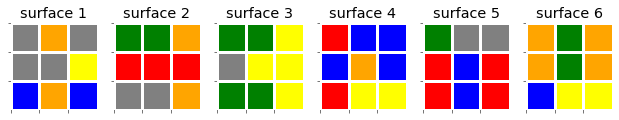

In [1]:
#ui+rubrick ok
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import tkinter as tk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib import colors
import random
from copy import deepcopy
import json
import time

plt.style.use('ggplot')

def clockwise(x,n):
    def clockwise1(x): 
        y = np.zeros(9).reshape(3,3)
        y[:,0] = x[2]
        y[:,1] = x[1]
        y[:,2] = x[0]
        return y
        
    for i in range(n):
        x = clockwise1(x)
    
    return x

def counter_clockwise(x,n):
    def counter_clockwise1(x): 
        y = np.zeros(9).reshape(3,3)
        y[:,0] = np.flip(x[0])
        y[:,1] = np.flip(x[1])
        y[:,2] = np.flip(x[2])
        return y
        
    for i in range(n):
        x = counter_clockwise1(x)
    
    return x

def slide_right4ele(a,b,c,d,n):
    
    x = np.append([np.append(a,b)],[np.append(c,d)])
    x = np.append(x[-n:],x[:-n])
    return x[0:3],x[3:6],x[6:9],x[9:12]
    
def rotate(surface,axis):
    surface = deepcopy(surface)
    if axis == 'x0':
        a,b,c,d = slide_right4ele(surface['1'][0],surface['2'][0],surface['3'][0],surface['4'][0],3)
        surface['1'][0] = a
        surface['2'][0] = b
        surface['3'][0] = c
        surface['4'][0] = d

        surface['5'] = clockwise(surface['5'],3)

    elif axis == 'x1':
        a,b,c,d = slide_right4ele(surface['1'][1],surface['2'][1],surface['3'][1],surface['4'][1],3)
        surface['1'][1] = a
        surface['2'][1] = b
        surface['3'][1] = c
        surface['4'][1] = d
   
    elif axis == 'x2':
        a,b,c,d = slide_right4ele(surface['1'][2],surface['2'][2],surface['3'][2],surface['4'][2],3)
        surface['1'][2] = a
        surface['2'][2] = b
        surface['3'][2] = c
        surface['4'][2] = d
        
        surface['6'] = counter_clockwise(surface['6'],3)
   
    elif axis == 'y0':
        a,b,c,d = slide_right4ele(np.flip(surface['3'][:,-1]),surface['5'][:,0],surface['1'][:,0],surface['6'][:,0],3)
        surface['3'][:,-1] = np.flip(a)
        surface['5'][:,0] = b
        surface['1'][:,0] = c
        surface['6'][:,0] = d
        
        surface['4'] = counter_clockwise(surface['4'],3)
              
    
    elif axis == 'y1':
        a,b,c,d = slide_right4ele(np.flip(surface['3'][:,1]),surface['5'][:,1],surface['1'][:,1],surface['6'][:,1],3)
        surface['3'][:,1] = np.flip(a)
        surface['5'][:,1] = b
        surface['1'][:,1] = c
        surface['6'][:,1] = d
    
    elif axis == 'y2':
        a,b,c,d = slide_right4ele(np.flip(surface['3'][:,0]),surface['5'][:,2],surface['1'][:,2],surface['6'][:,2],3)
        surface['3'][:,0] = np.flip(a)
        surface['5'][:,2] = b
        surface['1'][:,2] = c
        surface['6'][:,2] = d
        
        surface['2'] = clockwise(surface['2'],3)
                      

    elif axis == 'z0':
        a,b,c,d = slide_right4ele(np.flip(surface['5'][2]),surface['2'][:,0],np.flip(surface['6'][0]),np.flip(surface['4'][:,2]),3)
        surface['5'][2] = a
        surface['2'][:,0] = np.flip(b)
        surface['6'][0] = np.flip(c)
        surface['4'][:,2] = np.flip(d)
        
        surface['1'] = counter_clockwise(surface['1'],3)
  
    elif axis == 'z1':
        a,b,c,d = slide_right4ele(np.flip(surface['5'][1]),surface['2'][:,1],np.flip(surface['6'][1]),np.flip(surface['4'][:,1]),3)
        surface['5'][1] = a
        surface['2'][:,1] = np.flip(b)
        surface['6'][1] = np.flip(c)
        surface['4'][:,1] = np.flip(d)
    
    elif axis == 'z2':
        a,b,c,d = slide_right4ele(np.flip(surface['5'][0]),surface['2'][:,2],np.flip(surface['6'][2]),np.flip(surface['4'][:,0]),3)
        surface['5'][0] = a
        surface['2'][:,2] = np.flip(b)
        surface['6'][2] = np.flip(c)
        surface['4'][:,0] = np.flip(d)
        
        surface['3'] = clockwise(surface['3'],3)
        
    return surface

def updateUi_surface(data):
       
    cmap = colors.ListedColormap(['blue','gray','green','yellow','red','orange'])
    bounds = [0,1,2,3,4,5,6]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    
    ax[0].imshow(data['1'], cmap=cmap, norm=norm)
    ax[0].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[0].set_xticks(np.arange(-.5, 2.5, 1));
    ax[0].set_yticks(np.arange(-.5, 2.5, 1));
    ax[0].axes.xaxis.set_ticklabels([])
    ax[0].axes.yaxis.set_ticklabels([])
    ax[0].set_title('surface 1')

    ax[1].imshow(data['2'], cmap=cmap, norm=norm)
    ax[1].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[1].set_xticks(np.arange(-.5, 2.5, 1));
    ax[1].set_yticks(np.arange(-.5, 2.5, 1));
    ax[1].axes.xaxis.set_ticklabels([])
    ax[1].axes.yaxis.set_ticklabels([])
    ax[1].set_title('surface 2')

    ax[2].imshow(data['3'], cmap=cmap, norm=norm)
    ax[2].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[2].set_xticks(np.arange(-.5, 2.5, 1));
    ax[2].set_yticks(np.arange(-.5, 2.5, 1));
    ax[2].axes.xaxis.set_ticklabels([])
    ax[2].axes.yaxis.set_ticklabels([])
    ax[2].set_title('surface 3')

    ax[3].imshow(data['4'], cmap=cmap, norm=norm)
    ax[3].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[3].set_xticks(np.arange(-.5, 2.5, 1));
    ax[3].set_yticks(np.arange(-.5, 2.5, 1));
    ax[3].axes.xaxis.set_ticklabels([])
    ax[3].axes.yaxis.set_ticklabels([])
    ax[3].set_title('surface 4')

    ax[4].imshow(data['5'], cmap=cmap, norm=norm)
    ax[4].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[4].set_xticks(np.arange(-.5, 2.5, 1));
    ax[4].set_yticks(np.arange(-.5, 2.5, 1));
    ax[4].axes.xaxis.set_ticklabels([])
    ax[4].axes.yaxis.set_ticklabels([])
    ax[4].set_title('surface 5')

    ax[5].imshow(data['6'], cmap=cmap, norm=norm)
    ax[5].grid(which='major', axis='both', linestyle='-', color='white', linewidth=3)
    ax[5].set_xticks(np.arange(-.5, 2.5, 1));
    ax[5].set_yticks(np.arange(-.5, 2.5, 1));
    ax[5].axes.xaxis.set_ticklabels([])
    ax[5].axes.yaxis.set_ticklabels([])
    ax[5].set_title('surface 6')
        
    line.draw()
    
def BX0():
    print('rotate X0.. ')
    current_surface['surface'] = rotate(current_surface['surface'],'x0')
    
    l['text'] = 'vvvv'

    updateUi_surface(current_surface['surface'])

def BX1():
    print('rotate X1..')
    current_surface['surface'] = rotate(current_surface['surface'],'x1')
    updateUi_surface(current_surface['surface'])
       
def BX2():
    print('rotate X2..')
    current_surface['surface'] = rotate(current_surface['surface'],'x2')
    updateUi_surface(current_surface['surface'])
     
def BY0():
    print('rotate Y0..')
    current_surface['surface'] = rotate(current_surface['surface'],'y0')
    updateUi_surface(current_surface['surface'])
     
def BY1():
    print('rotate Y1..')
    current_surface['surface'] = rotate(current_surface['surface'],'y1')
    updateUi_surface(current_surface['surface'])
    
def BY2():
    print('rotate Y2..')
    current_surface['surface'] = rotate(current_surface['surface'],'y2')
    updateUi_surface(current_surface['surface'])
    
def BZ0():
    print('rotate Z0..')
    current_surface['surface'] = rotate(current_surface['surface'],'z0')
    updateUi_surface(current_surface['surface'])
    
def BZ1():
    print('rotate Z1..')
    current_surface['surface'] = rotate(current_surface['surface'],'z1')
    updateUi_surface(current_surface['surface'])
    
def BZ2():
    print('rotate Z2..')
    current_surface['surface'] = rotate(current_surface['surface'],'z2')
    updateUi_surface(current_surface['surface'])
    
# gggggggggggggggggggggggg
def GO():
    global nodes_expand,m,mv,v,lenge,kk,xm,x
    print('start..')

    if m == '':
        sta = 'up'
        print('up...',xm*kk)
        print(xm)
        print(xm[:-2*kk])
        nodes_expand = unit_expand(xm[:-2*kk])
        print(nodes_expand)
        if -2*kk+2 != 0:
            m,mv,v,lenge = find_min_that_more_threshold(nodes_expand,threshold,xm[:-2*kk+2])
        else:
            m,mv,v,lenge = find_min_that_more_threshold(nodes_expand,threshold,xm)
        if m == '':
            kk += 1
        else:
            kk = 1
        updateCurrenrSurface(xm[:-2*kk])
        
    else:
        xm = m
        x = xm + '\t value : ' + str(mv) + '\tg:'+str(v) + '\th:'+str(lenge)
    
        m,mv,v,lenge = find_min_that_more_threshold(nodes_expand,threshold,'')
    
        updateCurrenrSurface(m)
        sta = 'down'
        


    nodes_expand_msg = ''
    for i in nodes_expand.keys():
        nodes_expand_msg += i+':'+str(nodes_expand[i]['cost']) + '\n'

    print(nodes_expand_msg)
    
    
    updateUi_surface(current_surface['surface'])

    msg = x
    msg += '\n-------------------'+sta+str(kk)+'----------------------'
    msg += '\n'+nodes_expand_msg
    msg += '\nmin&<threshold : ' + m + '\t value : ' + str(mv) + '\tg:'+str(v) + '\th:'+str(lenge)
    msg += '\nthreshold : ' + str(threshold)
    msg += '\nnext path : ' + current_surface['path']

    print(msg)
    
    

    l['text'] = msg
    nodes_expand = unit_expand(m)

    
def RANDOM():
    print('Start surface..')
    print(start_surface)
    updateUi_surface(start_surface)

#-- UI setup -------------------------------------------------------------------------------
root = tk.Tk()
root.geometry('1200x450')
root.title("AI + Rubrick")

left_frame = tk.Frame(root)
left_frame.place(relx=0.03, rely=0.05, relwidth=0.25, relheight=0.9)

right_frame = tk.Frame(root, bg='#C0C0C0', bd=1.5)
right_frame.place(relx=0.3, rely=0.05, relwidth=0.65, relheight=0.5)

right_frame2 = tk.Frame(root, bg='#C0C0C0', bd=1.5)
right_frame2.place(relx=0.3, rely=0.5, relwidth=0.65, relheight=0.5)


#text
l = tk.Label(right_frame2, text = "Fact of the Day\nreusfdhgidf",justify=tk.LEFT)
# l.config(font =("Courier", 14))
l.place(rely=(0.1 + 0.1*0.01) ,relheight=1, relwidth=1)
l.pack(side=tk.LEFT, fill=tk.BOTH,expand=1)     
        
#initial graph
figure, ax = plt.subplots(1, 6,figsize=(20,20))
line = FigureCanvasTkAgg(figure, right_frame)
line.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH,expand=1)
x = np.linspace(0, 8, 1000)

#Button
RH = 0.10
BX0 = tk.Button(left_frame,text="X0",command = BX0)
BX0.place(relheight=RH, relwidth=1)
BX1 = tk.Button(left_frame,text="X1",command = BX1)
BX1.place(rely=(0.1 + RH*0.01) ,relheight=RH, relwidth=1)
BX2 = tk.Button(left_frame,text="X2",command = BX2)
BX2.place(rely= 2*(0.1 + RH*0.01) ,relheight=RH, relwidth=1)
BY0 = tk.Button(left_frame,text="Y0",command = BY0)
BY0.place(rely= 3*(0.1 + RH*0.01) ,relheight=RH, relwidth=1)
BY1 = tk.Button(left_frame,text="Y1",command = BY1)
BY1.place(rely= 4*(0.1 + RH*0.01) ,relheight=RH, relwidth=1)
BY2 = tk.Button(left_frame,text="Y2",command = BY2)
BY2.place(rely= 5*(0.1 + RH*0.01) ,relheight=RH, relwidth=1)
BZ0 = tk.Button(left_frame,text="Z0",command = BZ0)
BZ0.place(rely= 6*(0.1 + RH*0.01) ,relheight=RH, relwidth=1)
BZ1 = tk.Button(left_frame,text="Z1",command = BZ1)
BZ1.place(rely= 7*(0.1 + RH*0.01) ,relheight=RH, relwidth=1)
BZ2 = tk.Button(left_frame,text="Z2",command = BZ2)
BZ2.place(rely= 8*(0.1 + RH*0.01) ,relheight=RH, relwidth=1)
GO = tk.Button(left_frame,text="Go",command = GO)
GO.place(rely= 9*(0.1 + RH*0.01) ,relheight=RH, relwidth=0.5)
RANDOM = tk.Button(left_frame,text="Random",command = RANDOM)
RANDOM.place(rely= 9*(0.1 + RH*0.01), relx=0.5,relheight=RH, relwidth=0.5)

s = {
    '1' : np.array([0,0,0,0,0,0,0,0,0]).reshape(3,3),
    '2' : np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3),
    '3' : np.array([2,2,2,2,2,2,2,2,2]).reshape(3,3),
    '4' : np.array([3,3,3,3,3,3,3,3,3]).reshape(3,3),
    '5' : np.array([4,4,4,4,4,4,4,4,4]).reshape(3,3),
    '6' : np.array([5,5,5,5,5,5,5,5,5]).reshape(3,3),
    
}

updateUi_surface(s)
# root.mainloop()
#----------------------------------------------------------------------------------------------------
#start
    
goal_surface = {
    '1' : np.array([0,0,0,0,0,0,0,0,0]).reshape(3,3),
    '2' : np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3),
    '3' : np.array([2,2,2,2,2,2,2,2,2]).reshape(3,3),
    '4' : np.array([3,3,3,3,3,3,3,3,3]).reshape(3,3),
    '5' : np.array([4,4,4,4,4,4,4,4,4]).reshape(3,3),
    '6' : np.array([5,5,5,5,5,5,5,5,5]).reshape(3,3),
    
}

start_surface = {
    '1' : np.array([0,0,0,0,0,0,0,0,0]).reshape(3,3),
    '2' : np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3),
    '3' : np.array([2,2,2,2,2,2,2,2,2]).reshape(3,3),
    '4' : np.array([3,3,3,3,3,3,3,3,3]).reshape(3,3),
    '5' : np.array([4,4,4,4,4,4,4,4,4]).reshape(3,3),
    '6' : np.array([5,5,5,5,5,5,5,5,5]).reshape(3,3),
    
}

start_surface = rotate(start_surface,'x0')
start_surface = rotate(start_surface,'x0')
start_surface = rotate(start_surface,'x0')
start_surface = rotate(start_surface,'y1')
start_surface = rotate(start_surface,'y1')
start_surface = rotate(start_surface,'y1')
start_surface = rotate(start_surface,'z2')
start_surface = rotate(start_surface,'z2')
start_surface = rotate(start_surface,'z2')
start_surface = rotate(start_surface,'x1')
start_surface = rotate(start_surface,'x1')
start_surface = rotate(start_surface,'x1')

#------------------------------------------------------------------------------------

def find_cost(goal_surface,surface):
    surface = deepcopy(surface)
    def surfaceToOneArray(surface):
        x = np.array([])
        for i in range(1,7):
            x = np.append(x,surface[str(i)])
        return x
    def count_zeros(x):
        count = 0
        for i in x:
            if i == 0:
                count += 1
        return count

    goal_array = surfaceToOneArray(goal_surface)
    start_array = surfaceToOneArray(surface)
        
    x = np.subtract(goal_array, start_array) 

    return 54-count_zeros(x)


# def updateCurrenrSurface(path):
# #     print('path find',path)
#     print('current_surface',current_surface['path'])
#     surface = current_surface['surface']
#     if len(current_surface['path']) < len(path):
# #         print('aaa')
#         a = path.replace(current_surface['path'],'')
#         print('+',a)
#         surface = rotate(current_surface['surface'],a)
    
#     elif len(current_surface['path']) > len(path):
#         a = current_surface['path'].replace(path,'')
#         print('-',a)
#         surface = rotate(current_surface['surface'],a)
#         surface = rotate(current_surface['surface'],a)
#         surface = rotate(current_surface['surface'],a)
        
#     current_surface.update({'path':path,'surface':surface})

def update_current_surface(path):
    p = [path[i:i+2] for i in range(0, len(path), 2)]
    print(p)
    sf = start_surface
    for  i in p:
        sf = rotate(sf,i)
        
    s = { 'path':path, 'surface':sf}
    return s
    
def unit_expand(node):
#     global start_surface,goal_surface
    n = [node[i:i+2] for i in range(0, len(node), 2)]
    e = {}
    surface = deepcopy(start_surface)
#     surface = start_surface
#     print(n)
    for i in ['x0','x1','x2','y0','y1','y2','z0','z1','z2']:
        #find current serface
        for ii in n:
            if ii == 'st':
                surface = deepcopy(start_surface)
            else:
                surface = rotate(surface,ii)
        lenge = int(len(node)/2)
        cost = find_cost(goal_surface,rotate(surface,i))
        print('cost=',cost + lenge,'lenge',lenge,'value',cost)
        e.update({node+i:{'cost':cost + lenge,'lenge':lenge,'value':cost}})
        
    return e

def find_min_that_more_threshold(node,threshold,everexplane,next_threshold):
#     find min alter
    nod = deepcopy(node)
    m = ''
    mv = 99999
    v = ''
    l = ''
    print(nod)

    Z = nod.keys()
    if everexplane != '':
#         everexplane = 'stxox1y1z0x2'
        u = unit_expand(everexplane[:-2])
        Z = []
        for i in u.keys():
            if i != everexplane and u[i]['cost'] > u[everexplane]['cost']:
                Z.append(i)
        
# #         everexplane = 'stxox1y1z0y2'
# #         everexplane[-2:]
#         z = 'x0x1x2y0y1y2z0z1z2'
#         z = z.split(everexplane[-2:])
#         z = z[-1]
#         z = [z[i:i+2] for i in range(0, len(z), 2)]
#         z
#         Z = []
#         for i in z:
#             Z.append(everexplane[:-2]+i)
            
    for i in Z:
        print(i,nod[i]['cost'])
        if nod[i]['cost'] < threshold and nod[i]['cost'] < mv :
            m = i
            mv = nod[i]['cost']
            v = nod[i]['value']
            l = nod[i]['lenge']
        if m == '':
            for i in nod.keys():
                if nod[i]['cost'] >= threshold:
                    if next_threshold == threshold:
                        next_threshold = nod[i]['cost']
                    if nod[i]['cost'] < next_threshold and nod[i]['cost'] > threshold:
                        next_threshold = nod[i]['cost']

            
        
    return m,mv,v,l,next_threshold

# def find_min_that_more_threshold(node,threshold,everexplane):
# #     find min alter
#     nod = deepcopy(node)
#     m = ''
#     mv = 99999
#     v = ''
#     l = ''
#     print(nod)
#     for i in nod.keys():
#         print(i,nod[i]['cost'])
#         if nod[i]['cost'] < threshold and nod[i]['cost'] < mv and i != everexplane:
#             m = i
#             mv = nod[i]['cost']
#             v = nod[i]['value']
#             l = nod[i]['lenge']
        
#     return m,mv,v,l

val_start = find_cost(goal_surface,start_surface)
current_surface = {'path': 'st','surface':start_surface}
nodes_expand = unit_expand('st')
m = 'st'
mv = find_cost(goal_surface,start_surface)
v = mv
lenge = 0
kk = 1
xm = ''
x = ''
threshold = 1
updateUi_surface(current_surface['surface'])
next_threshold = 1
found = False

for i in range(100000):
    if found == True:        
        break
    if v == 0:
        found = True
        print('xmmmmm111111111111',xm)
        
    
#     if xm == 'st':
    if len(xm) == 2:
        threshold = next_threshold
        xm = ''
#     if len(list(nodes_expand.keys())[0]) == 2:
#         print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
#         break
#         val_start = find_cost(goal_surface,start_surface)
#         current_surface = {'path': 'st','surface':start_surface}
#         nodes_expand = unit_expand('st')
#         m = 'st'
#         mv = find_cost(goal_surface,start_surface)
#         v = mv
#         lenge = 0
#         kk = 1
#         xm = ''
#         x = ''
#         threshold = next_threshold
#         m,mv,v,lenge,next_threshold = find_min_that_more_threshold(nodes_expand,threshold,xm,next_threshold)
        
#         updateUi_surface(current_surface['surface'])
#         next_threshold = threshold
#         threshold = next_threshold
#         next_threshold = 999
#         xm = ''
#         m,mv,v,lenge,next_threshold = find_min_that_more_threshold(nodes_expand,threshold,xm,next_threshold)
        
    if m == '' and current_surface['path'] != 'st':
        sta = 'up'
        print('up...',xm*kk)
        print(xm)
        print(xm[:-2*kk])
        nodes_expand = unit_expand(xm[:-2*kk])
        print(nodes_expand)
        if -2*kk+2 != 0:
            m,mv,v,lenge,next_threshold = find_min_that_more_threshold(nodes_expand,threshold,xm[:-2*kk+2],next_threshold)
        else:
            m,mv,v,lenge,next_threshold = find_min_that_more_threshold(nodes_expand,threshold,xm,next_threshold)
        if m == '':
            kk += 1
        else:
            kk = 1
#         updateCurrenrSurface('st'+xm[:-2*kk])
        
    else:
        print('down...')
        xm = m
        x = xm + '\t value : ' + str(mv) + '\tg:'+str(v) + '\th:'+str(lenge) + '\tnext_threshold: '+str(next_threshold)
    
        m,mv,v,lenge,next_threshold = find_min_that_more_threshold(nodes_expand,threshold,'',next_threshold)
    
#         updateCurrenrSurface('st'+m)
        sta = 'down'
        


    nodes_expand_msg = ''
    for i in nodes_expand.keys():
        nodes_expand_msg += i+':'+str(nodes_expand[i]['cost']) + '\n'

    print(nodes_expand_msg)
    
#     updateCurrenrSurface('st'+xm)
    current_surface = update_current_surface(xm)

    print('\n==========================\n',current_surface)
    
#     updateUi_surface(current_surface['surface'])
    line.draw()

    msg = x
    msg += '\n-------------------'+sta+str(kk)+'----------------------'
    msg += '\n'+nodes_expand_msg
    msg += '\nmin&<threshold : ' + m + '\t value : ' + str(mv) + '\tg:'+str(v) + '\th:'+str(lenge)
    msg += '\nthreshold : ' + str(threshold)
    msg += '\nnext path : ' + current_surface['path']

    print(msg)
    
    
    
    

    l['text'] = msg
#     nodes_expand = unit_expand(m)
#     if current_surface['path'] == '':
#         current_surface = update_current_surface('st')
    
    nodes_expand = unit_expand(current_surface['path'])
    
#     time.sleep(1)


root.mainloop()

In [2]:
nodes_expand = unit_expand('st')

NameError: name 'unit_expand' is not defined

In [39]:
# updateCurrenrSurface('stz2y1x0')


def update_current_surface(path):
    p = [path[i:i+2] for i in range(0, len(path), 2)]
    print(p)
    sf = start_surface
    for  i in p:
        sf = rotate(sf,i)

    return sf

path = 'z2y1x0'
surface = update_current_surface(path)
surface

# start_surface
# surface = rotate(current_surface['surface'],a)

['z2', 'y1', 'x0']


{'1': array([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]),
 '2': array([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]),
 '3': array([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]]),
 '4': array([[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]]),
 '5': array([[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.]]),
 '6': array([[5, 5, 5],
        [5, 5, 5],
        [5, 5, 5]])}

In [11]:
def unit_expand(node):
#     global start_surface,goal_surface
    n = [node[i:i+2] for i in range(0, len(node), 2)]
    e = {}
    surface = deepcopy(start_surface)
#     surface = start_surface
#     print(n)
    for i in ['x0','x1','x2','y0','y1','y2','z0','z1','z2']:
        #find current serface
        for ii in n:
            if ii == 'st':
                surface = deepcopy(start_surface)
            else:
                surface = rotate(surface,ii)
        lenge = int(len(node)/2)
        cost = find_cost(goal_surface,rotate(surface,i))
        print('cost=',cost + lenge,'lenge',lenge,'value',cost)
        e.update({node+i:{'cost':cost + lenge,'lenge':lenge,'value':cost}})
        
    return e

current_surface
# unit_expand('stz2y1z2z2x0x0x0y1y1y1y1y1y1y1y1y1y1y1y1y1y1y1y1y1y1y1y1y1y1y1y1y1')
updateCurrenrSurface('stz2y1z2z2x0x0x0y1y1y1y1y1y1y1y1y1y1y1y1y1y1y1y1y1y1y1y1y1y1y1y1y1')
current_surface
updateUi_surface(current_surface['surface'])
l['text'] = msg

In [1]:
def unit_expand(node):
    global start_surface,goal_surface
    n = [node[i:i+2] for i in range(0, len(node), 2)]
    e = {}
    surface = deepcopy(start_surface)
#     surface = start_surface
#     print(n)
    for i in ['x0','x1','x2','y0','y1','y2','z0','z1','z2']:
        #find current serface
        for ii in n:
            if ii == 'st':
                surface = deepcopy(start_surface)
            else:
                surface = rotate(surface,ii)
        lenge = int(len(node)/2)
        cost = find_cost(goal_surface,rotate(surface,i))
        print('cost=',cost + lenge,'lenge',lenge,'value',cost)
        e.update({node+i:{'cost':cost + lenge}})
        
    return e

def find_min_that_more_threshold(node,threshold):
    #find min alter
    nod = deepcopy(node)
    m = ''
    mv = 99999
#     print(nod)
    for i in nod.keys():
#         print(i,nod[i]['cost'])
        if nod[i]['cost'] < threshold and nod[i]['cost'] < mv:
            m = i
            mv = nod[i]['cost']
            
            

    return m,mv


val_start = find_cost(goal_surface,start_surface)
current_surface = {'path': 'st','surface':start_surface}
nodes_expand = unit_expand('st')

threshold = 34

# m,mv = find_min_that_more_threshold(nodes_expand,threshold)
# print('min:',m,mv)
# updateCurrenrSurface(m)
# nodes_expand = unit_expand(m)

# m,mv = find_min_that_more_threshold(nodes_expand,threshold)
# print('min:',m,mv)




NameError: name 'find_cost' is not defined

In [2]:
current_surface = {'path': 'stxoy2',
 'surface': {'1': np.array([[3, 4, 3],
         [0, 4, 0],
         [0, 4, 0]]),
  '2': np.array([[0, 0, 4],
         [1, 1, 2],
         [1, 1, 4]]),
  '3': np.array([[1., 2., 2.],
         [5., 5., 5.],
         [1., 2., 2.]]),
  '4': np.array([[5, 2, 2],
         [0, 3, 3],
         [5, 3, 3]]),
  '5': np.array([[3., 3., 2.],
         [4., 2., 4.],
         [4., 1., 4.]]),
  '6': np.array([[5, 3, 5],
         [5, 0, 5],
         [1, 1, 0]])}}

def updateCurrenrSurface(path):
#     print('path find',path)
#     print('current_surface',current_surface['path'])

    surface = current_surface['surface']
    
    if len(current_surface['path']) < len(path):
#         print('aaa')
        a = path.replace(current_surface['path'],'')
#         print('+',a)
        surface = rotate(current_surface['surface'],a)
    
    elif len(current_surface['path']) > len(path):
        a = current_surface['path'].replace(path,'')
#         print('-',a)
        surface = rotate(current_surface['surface'],a)
        surface = rotate(current_surface['surface'],a)
        surface = rotate(current_surface['surface'],a)
        
    current_surface.update({'path':path,'surface':surface})
    
    
#     print(current_surface)
        
        
#     rotate(current_surface['surface'],i)
    
    
        

        
    
updateCurrenrSurface('stxo')
current_surface

NameError: name 'np' is not defined

In [ ]:
current_surface

In [ ]:
current_surface['path'] = 'xxxx'
current_surface

In [11]:
n = {'stx0': {'cost': 33}, 'stx1': {'cost': 35}, 'stx2': {'cost': 39}, 'sty0': {'cost': 39}, 'sty1': {'cost': 33}, 'sty2': {'cost': 37}, 'stz0': {'cost': 37}, 'stz1': {'cost': 39}, 'stz2': {'cost': 31}}

m = ''
for i in n.keys():
    m += i+':'+str(n[i]['cost']) + '\n'


stx0:33
stx1:35
stx2:39
sty0:39
sty1:33
sty2:37
stz0:37
stz1:39
stz2:31



In [ ]:
val_start = find_cost(goal_surface,start_surface)
val_start

In [ ]:
current_surface = {'path': 'st','surface':start_surface}
current_surface

In [ ]:
def unit_expand(node):
    global start_surface,goal_surface
    n = [node[i:i+2] for i in range(0, len(node), 2)]
    e = {}
    surface = deepcopy(start_surface)
#     surface = start_surface
#     print(n)
    for i in ['x0','x1','x2','y0','y1','y2','z0','z1','z2']:
        #find current serface
        for ii in n:
            if ii == 'st':
                surface = deepcopy(start_surface)
            else:
                surface = rotate(surface,ii)
        lenge = int(len(node)/2)
        cost = find_cost(goal_surface,rotate(surface,i))
        print('cost=',cost + lenge,'lenge',lenge,'value',cost)
        e.update({node+i:{'cost':cost + lenge}})
        
    return e

nodes_expand = unit_expand('st')
nodes_expand



In [ ]:
def find_min_that_more_threshold(node,threshold):
    #find min alter
    nod = deepcopy(node)
    m = ''
    mv = 99999
#     print(nod)
    for i in nod.keys():
#         print(i,nod[i]['cost'])
        if nod[i]['cost'] < threshold and nod[i]['cost'] < mv:
            m = i
            mv = nod[i]['cost']
            
            

    return m,mv

threshold = 34
m,mv = find_min_that_more_threshold(nodes_expand,threshold)
print('min:',m,mv)

In [ ]:
nodes_expand = unit_expand(m)
nodes_expand

In [ ]:
m,mv = find_min_that_more_threshold(nodes_expand,threshold)
print('min:',m,mv)

In [ ]:
nodes_expand = unit_expand(m)
nodes_expand

In [ ]:
m,mv = find_min_that_more_threshold(nodes_expand,threshold)
print('min:',m,mv)

In [ ]:
nodes_expand = unit_expand(m)
nodes_expand

In [ ]:
m,mv = find_min_that_more_threshold(nodes_expand,threshold)
print('min:',m,mv)

In [ ]:
nodes_expand = unit_expand(m)
nodes_expand

In [ ]:
m,mv = find_min_that_more_threshold(nodes_expand,threshold)
print('min:',m,mv)

In [ ]:
nodes_expand = unit_expand(m)
nodes_expand

In [ ]:
# {'path': 'st',
#  'suface': {'1': array([[3, 4, 3],
#          [0, 4, 0],
#          [0, 4, 0]]),
#   '2': array([[0, 0, 4],
#          [1, 1, 2],
#          [1, 1, 4]]),
#   '3': array([[1., 2., 2.],
#          [5., 5., 5.],
#          [1., 2., 2.]]),
#   '4': array([[5, 2, 2],
#          [0, 3, 3],
#          [5, 3, 3]]),
#   '5': array([[3., 3., 2.],
#          [4., 2., 4.],
#          [4., 1., 4.]]),
#   '6': array([[5, 3, 5],
#          [5, 0, 5],
#          [1, 1, 0]])}}

# node = 'stx0x1'
# find_surface_from_path(node,current_surface)

# waiting_nodes = unit_expand('st')
# {'stx0': {'cost': 22},
#  'stx1': {'cost': 18},
#  'stx2': {'cost': 10},
#  'sty0': {'cost': 12},
#  'sty1': {'cost': 8},
#  'sty2': {'cost': 4},
#  'stz0': {'cost': 2},
#  'stz1': {'cost': 6},
#  'stz2': {'cost': 8}}



# waiting_nodes = {"st": {"cost": val_start}}



    
# print('start_surface:',start_surface)
# val_start = find_cost(goal_surface,start_surface)

# waiting_nodes = unit_expand('st')
# print(len(waiting_nodes.keys()),'waiting_nodes',json.dumps(waiting_nodes, indent=4))

#find min alter
# m,mv,a,av = find_min_alter_node(waiting_nodes)
# print('min:',m,mv,'\talter:',a,av)    

# for i in range(100000):
#     waiting_nodes = upppp(waiting_nodes)
#     if find_min_alter_node(waiting_nodes)[1] == 0:
#         break
        
# waiting_nodes = upppp(waiting_nodes)
# waiting_nodes = upppp(waiting_nodes)
# waiting_nodes = upppp(waiting_nodes)
# waiting_nodes = upppp(waiting_nodes)
# waiting_nodes = upppp(waiting_nodes)

